# Sección nueva

La cantidad de estrellas son: 127
El flujo total es de: 481.0
El porcentaje de flujo es de: 0.35421821609520443


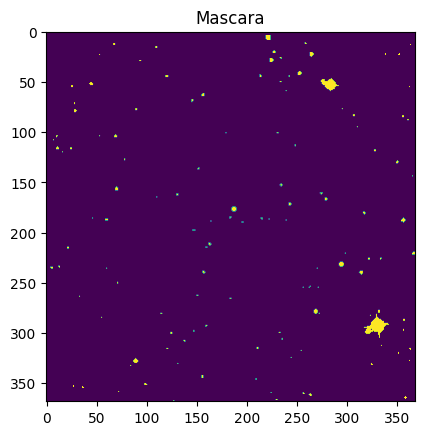

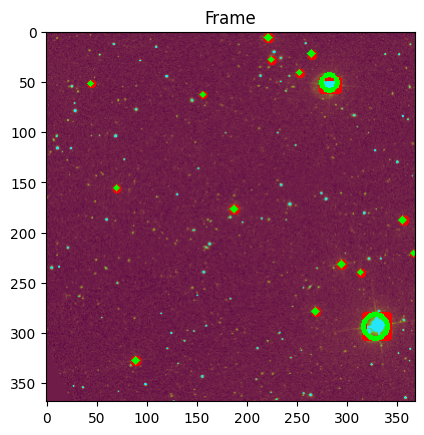

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

original = cv2.imread('stars.png')

# Obtener las dimensiones de la imagen
alto, ancho, canales = original.shape

# Contar los píxeles totales
pixeles_totales = alto * ancho

azulClaro=np.array([270,10,20], dtype=np.uint8)
azulOscuro=np.array([310,255,255], dtype=np.uint8)

frameHSV=cv2.cvtColor(original, cv2.COLOR_BGR2HSV)
mask=cv2.inRange(frameHSV, azulClaro, azulOscuro)
contornos,_=cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        #cv2.findContours(imagen,modo,metodo[,contornos[,jerarquia[,OFFSET]]])
        #RETR_EXTERNAL:solo se queda con los contornos externos
        #CHAIN_APPROX_SIMPLE: encierra al contorno en torno en 4 puntos
        #la variable de contornos es vectorial

counter = 0
flujo = 0
for c in contornos:
    counter += 1
    area=cv2.contourArea(c)
    flujo += area
    if area > 3:
        xr,yr,w,h=cv2.boundingRect(c)
        cv2.rectangle(original,(xr,yr),(xr+w,yr+h),(255,0,0),3)
        (xc,yc),radio=cv2.minEnclosingCircle(c)
        #cv2.drawContours(imagen,contornos,contornoIdx,color[,grosor[,tipolinea[jerarquia[,nivelmax[,OFFSET]]]]])
        centro=(int(xc),int(yc))
        radio=int(radio)
        cv2.circle(original,centro,radio,(0,255,0),3)
        #M=moments()
        #xm,ym=,
        #centro=(int(xm),int(ym))


print(f"La cantidad de estrellas son: {counter}")
print(f"El flujo total es de: {flujo}")
#print(pixeles_totales)
print(f"El porcentaje de flujo es de: {(flujo/pixeles_totales)*100}")


plt.imshow(mask)
plt.title('Mascara')
plt.show()

plt.imshow(original)
plt.title('Frame')
plt.show()

cv2.waitKey(0)

cv2.destroyAllWindows()